In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("reddit_politics.csv")

In [3]:
df.head()


,Unnamed: 0,ID,Title,Author,Date,Post,Flair
0,12,5ld9hf,A year of outrageous lies: From economic growt...,udi_baaba,01-01-2017 08:42,NaN,Politics
1,16,5ldd3f,Don't tamper with personal laws: Muslim bodies,TemptNotTheBlade,01-01-2017 09:10,NaN,Politics
2,17,5ldd6b,You need politics to discover truth: Yogendra ...,ohahouch,01-01-2017 09:11,NaN,Politics
3,20,5ldfyn,"Annual Predictions for India, US and Pakistan ...",drishtikone,01-01-2017 09:33,NaN,Politics
4,31,5ldovw,"With no 'mitro', PM Modi denied discounted dri...",z921,01-01-2017 10:42,NaN,Politics


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)


In [5]:
d=d.drop(['Post'],axis=1)
d

,ID,Title,Author,Date,Flair
0,5ld9hf,A year of outrageous lies: From economic growt...,udi_baaba,01-01-2017 08:42,Politics
1,5ldd3f,Don't tamper with personal laws: Muslim bodies,TemptNotTheBlade,01-01-2017 09:10,Politics
2,5ldd6b,You need politics to discover truth: Yogendra ...,ohahouch,01-01-2017 09:11,Politics
3,5ldfyn,"Annual Predictions for India, US and Pakistan ...",drishtikone,01-01-2017 09:33,Politics
4,5ldovw,"With no 'mitro', PM Modi denied discounted dri...",z921,01-01-2017 10:42,Politics
...,...,...,...,...,...
93499,g85pji,I haven’t read any confirmed articles that gov...,mcbc97,26-04-2020 07:09,Politics
93500,g87efp,"Divya Bhaskar(Guj), 25th April, front jacket r...",krush_o,26-04-2020 09:08,Politics
93501,g87tel,Arnab Goswami tells SC all parties in Palghar ...,plshelpthedog,26-04-2020 09:39,Politics
93502,g892yf,"Reliance hired lobbyist Brian Ballard, a close...",mayblum,26-04-2020 11:18,Politics


In [6]:
len(df)

93504

In [7]:
features=df[['Title','Date']]

In [8]:
features.head()

,Title,Date
0,A year of outrageous lies: From economic growt...,01-01-2017 08:42
1,Don't tamper with personal laws: Muslim bodies,01-01-2017 09:10
2,You need politics to discover truth: Yogendra ...,01-01-2017 09:11
3,"Annual Predictions for India, US and Pakistan ...",01-01-2017 09:33
4,"With no 'mitro', PM Modi denied discounted dri...",01-01-2017 10:42


In [9]:
features['date'] = pd.to_datetime(features['Date']).dt.to_period('D')
features.head()

D:\ML_LD\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Title,Date,date
0,A year of outrageous lies: From economic growt...,01-01-2017 08:42,2017-01-01
1,Don't tamper with personal laws: Muslim bodies,01-01-2017 09:10,2017-01-01
2,You need politics to discover truth: Yogendra ...,01-01-2017 09:11,2017-01-01
3,"Annual Predictions for India, US and Pakistan ...",01-01-2017 09:33,2017-01-01
4,"With no 'mitro', PM Modi denied discounted dri...",01-01-2017 10:42,2017-01-01


In [10]:
features['Date'] = features['date'].dt.strftime('%d-%m-%Y')
features=features.drop(['date'],axis=1)


D:\ML_LD\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
features['year'] = pd.DatetimeIndex(features['Date']).year
features.head()

,Title,Date,year
0,A year of outrageous lies: From economic growt...,01-01-2017,2017
1,Don't tamper with personal laws: Muslim bodies,01-01-2017,2017
2,You need politics to discover truth: Yogendra ...,01-01-2017,2017
3,"Annual Predictions for India, US and Pakistan ...",01-01-2017,2017
4,"With no 'mitro', PM Modi denied discounted dri...",01-01-2017,2017


In [12]:
d=features[['Title','Date']]
Dates2=list(d['Date'].unique())

k=[]
for i in Dates2:
    k.append([i,len(d[d['Date']==i])])
reviews_per_day=pd.DataFrame(k,columns=['Date','no_of_reviews'])

In [13]:
features['month'] = pd.to_datetime(features['Date']).dt.to_period('M')
D=features[['Title','month']]
Dates1=list(D['month'].unique())

k=[]
for i in Dates1:
    k.append([i,len(D[D['month']==i])])

In [14]:
reviews_per_month=pd.DataFrame(k,columns=['month','no_of_reviews'])

In [15]:

Day=features[['Title','year']]
Dates=list(Day['year'].unique())

In [16]:
k=[]
for i in Dates:
    k.append([i,len(Day[Day['year']==i])])


In [17]:
reviews_per_year=pd.DataFrame(k,columns=['year','no_of_reviews'])

In [18]:
#reviews_per_day.to_csv('reviews_per_day.csv')
#reviews_per_month.to_csv('reviews_per_month.csv')
#reviews_per_year.to_csv('reviews_per_year.csv')

In [19]:
X1=list(reviews_per_day['Date'])
Y1=list(reviews_per_day['no_of_reviews'])

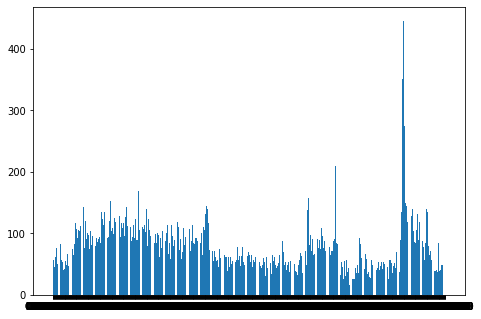

In [20]:
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])

ax.bar(X1,Y1)
plt.show()

In [21]:
X2=list(reviews_per_month['month'].astype('str'))
Y2=list(reviews_per_month['no_of_reviews'])

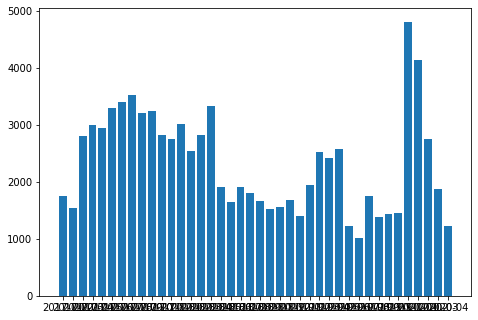

In [22]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])

ax.bar(X2,Y2)
plt.show()

In [23]:
X3=list(reviews_per_year['year'])
Y3=list(reviews_per_year['no_of_reviews'])

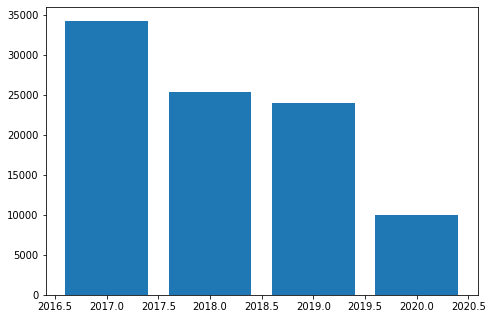

In [24]:
fig3 = plt.figure()
ax = fig3.add_axes([0,0,1,1])

ax.bar(X3,Y3)
plt.show()